In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [64]:
file_name = "../../api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [65]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [66]:
target_user = "@BBC"

counter = 1

sentiments = []

for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        counter = counter + 1
        



In [67]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Fri Feb 02 20:04:03 +0000 2018,1.00,0.0,0.00,1
1,0.0000,Fri Feb 02 19:32:04 +0000 2018,1.00,0.0,0.00,2
2,0.0000,Fri Feb 02 19:00:07 +0000 2018,1.00,0.0,0.00,3
3,0.4588,Fri Feb 02 18:30:06 +0000 2018,0.85,0.0,0.15,4
4,0.0000,Fri Feb 02 17:31:01 +0000 2018,1.00,0.0,0.00,5


In [68]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker=".", linewidth=0.5,
         alpha=0.8)

from dateutil import parser
first_tweet = parser.parse(sentiments_pd["Date"][0])

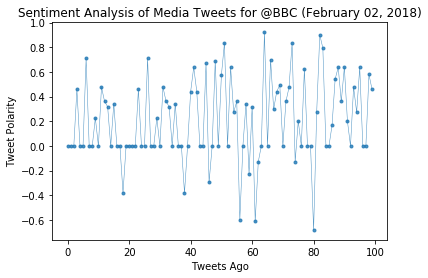

In [69]:
plt.title(f"Sentiment Analysis of Media Tweets for {target_user} ({first_tweet:%B %d, %Y})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

plt.savefig('bbc.png')
plt.show()

In [70]:
target_user = "@CBS"

counter = 1

sentiments = []

for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        counter = counter + 1
        

In [71]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.0772,Fri Feb 02 22:36:13 +0000 2018,0.925,0.075,0.000,1
1,0.4019,Fri Feb 02 20:07:40 +0000 2018,0.856,0.000,0.144,2
2,0.4003,Fri Feb 02 19:03:33 +0000 2018,0.876,0.000,0.124,3
3,0.6114,Fri Feb 02 17:23:18 +0000 2018,0.834,0.000,0.166,4
4,0.0000,Thu Feb 01 22:04:41 +0000 2018,1.000,0.000,0.000,5


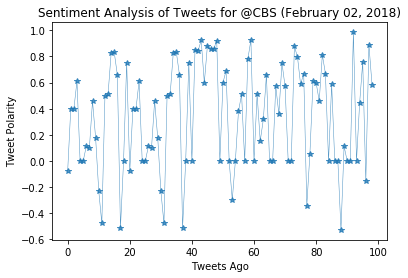

In [72]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="*", linewidth=0.5,
         alpha=0.8)

from dateutil import parser
first_tweet = parser.parse(sentiments_pd["Date"][0])

plt.title(f"Sentiment Analysis of Tweets for {target_user} ({first_tweet:%B %d, %Y})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

plt.savefig('CBS.png')
plt.show()

In [73]:
target_user = "@CNN"

counter = 1

sentiments = []

for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        counter = counter + 1

In [74]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sat Feb 03 03:31:05 +0000 2018,1.000,0.000,0.0,1
1,-0.5719,Sat Feb 03 03:21:07 +0000 2018,0.749,0.251,0.0,2
2,-0.2716,Sat Feb 03 03:11:02 +0000 2018,0.896,0.104,0.0,3
3,-0.7783,Sat Feb 03 03:04:33 +0000 2018,0.709,0.291,0.0,4
4,0.0000,Sat Feb 03 02:42:03 +0000 2018,1.000,0.000,0.0,5


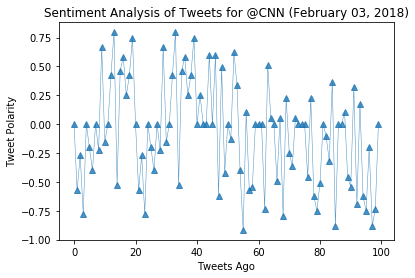

In [75]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="^", linewidth=0.5,
         alpha=0.8)

from dateutil import parser
first_tweet = parser.parse(sentiments_pd["Date"][0])

plt.title(f"Sentiment Analysis of Tweets for {target_user} ({first_tweet:%B %d, %Y})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

plt.savefig('cnn.png')
plt.show()

In [76]:
target_user = "@FoxNews"

counter = 1

sentiments = []

for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        counter = counter + 1

In [77]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.2960,Sat Feb 03 03:43:09 +0000 2018,0.905,0.095,0.000,1
1,-0.5859,Sat Feb 03 03:36:11 +0000 2018,0.730,0.270,0.000,2
2,0.0000,Sat Feb 03 03:27:26 +0000 2018,1.000,0.000,0.000,3
3,0.1280,Sat Feb 03 03:22:42 +0000 2018,0.845,0.066,0.089,4
4,0.0000,Sat Feb 03 03:15:35 +0000 2018,1.000,0.000,0.000,5


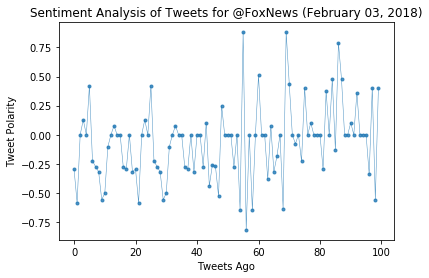

In [78]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker=".", linewidth=0.5,
         alpha=0.8)

from dateutil import parser
first_tweet = parser.parse(sentiments_pd["Date"][0])

plt.title(f"Sentiment Analysis of Tweets for {target_user} ({first_tweet:%B %d, %Y})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()


In [79]:
target_user = "@nytimes"

counter = 1

sentiments = []

for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        counter = counter + 1

In [80]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.3612,Sat Feb 03 03:33:03 +0000 2018,0.884,0.116,0.000,1
1,0.0258,Sat Feb 03 03:18:04 +0000 2018,0.700,0.148,0.152,2
2,0.0000,Sat Feb 03 03:03:03 +0000 2018,1.000,0.000,0.000,3
3,0.0000,Sat Feb 03 02:48:05 +0000 2018,1.000,0.000,0.000,4
4,0.7783,Sat Feb 03 02:33:03 +0000 2018,0.599,0.081,0.320,5


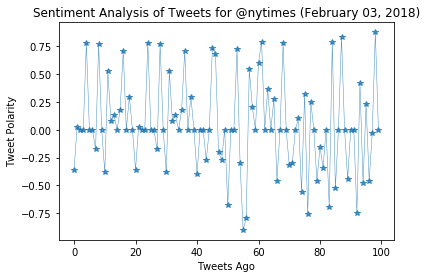

In [81]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="*", linewidth=0.5,
         alpha=0.8)

from dateutil import parser
first_tweet = parser.parse(sentiments_pd["Date"][0])

plt.title(f"Sentiment Analysis of Tweets for {target_user} ({first_tweet:%B %d, %Y})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [82]:
target_term = "@BBC"

In [83]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [84]:
public_tweets = api.search(target_term, count=100, result_type='recent')

In [85]:
for tweet in public_tweets['statuses']:
    compound = analyzer.polarity_scroes(tweet['text'])["compound"]
    pos = analyzer.polarity_scores(tweet['text'])['pos']
    neu = analyzer.polarity_scores(tweet['text'])['neu']
    neg

AttributeError: 'SentimentIntensityAnalyzer' object has no attribute 'polarity_scroes'